## Final Project Submission

Please fill out: 
* Student name: Virgilia Antonucci and Makonnen Sharpe
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Joseph Mata
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

We must load relevant libraries and the datasets

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

First step is to look through the data.

In [3]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Ensure the 'domestic_gross' and 'foreign_gross' columns are numeric (if they aren't already)
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Create the 'total_gross' column by adding the two columns

movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [5]:
top_20_rows_gross = movie_gross.nlargest(20, 'total_gross')
top_20_rows_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [6]:
rows_with_nans = movie_gross[movie_gross.isnull().any(axis=1)]
print(rows_with_nans)

                                       title      studio  domestic_gross  \
210            Outside the Law (Hors-la-loi)         NaN         96900.0   
222                                  Flipped          WB       1800000.0   
230               It's a Wonderful Afterlife         UTV             NaN   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  total_gross  
210       3300000.0  2010    3396900.0  
222  

In [7]:
movie_gross = movie_gross.dropna()

In [8]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
# Replace 'zippedData/rt.reviews.tsv.gz' with the actual file path
file_path = 'zippedData/rt.reviews.tsv.gz'

# Read the TSV file into a Pandas DataFrame with 'latin1' encoding
reviews = pd.read_csv(file_path, delimiter='\t', encoding='latin1')

reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
reviews = reviews.dropna()

In [11]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
conn = sqlite3.connect('zippedData/im.db')

In [14]:
query = "SELECT * FROM sqlite_master"

df = pd.read_sql(query, conn)

df.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [15]:
query = "SELECT * FROM sqlite_master"

df = pd.read_sql(query, conn)

df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [16]:
def set_nulls_to_unknown(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Get the list of tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [table[0] for table in cursor.fetchall()]
    
    for table in tables:
        # Get columns of the table
        cursor.execute(f"PRAGMA table_info({table});")
        columns = [column[1] for column in cursor.fetchall()]  # index 1 is for the column name
        
        # Update each column setting NULL to 'unknown'
        for col in columns:
            cursor.execute(f"UPDATE {table} SET {col} = 'unknown' WHERE {col} IS NULL;")
        
        conn.commit()
    
    conn.close()

# Call the function with your SQLite database path
set_nulls_to_unknown('zippedData/im.db')

In [17]:
# Making sure the above code worked

def check_nulls(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Get the list of tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [table[0] for table in cursor.fetchall()]

    for table in tables:
        # Get columns of the table
        cursor.execute(f"PRAGMA table_info({table});")
        columns = [column[1] for column in cursor.fetchall()]

        # Check each column for NULL values
        for col in columns:
            cursor.execute(f"SELECT COUNT(*) FROM {table} WHERE {col} IS NULL;")
            null_count = cursor.fetchone()[0]
            
            if null_count > 0:
                print(f"Table '{table}', Column '{col}' has {null_count} NULL values.")
            else:
                print("No nulls, bestie!")
    
    conn.close()

# Call the function with your SQLite database path
check_nulls('zippedData/im.db')

No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!
No nulls, bestie!


Now we'll go and clean spesfic tables.

# Budgets

In [18]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
budgets['production_budget'] = budgets['production_budget'].str.replace('[$,]', '', regex=True).astype(float)

In [20]:
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('[$,]', '', regex=True).astype(float)

In [21]:
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('[$,]', '', regex=True).astype(float)

In [22]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'], format='%b %d, %Y')

In [23]:
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'], errors='coerce')

print(budgets.head())

   id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


In [24]:
movie_info_sorted_by_bred = budgets.sort_values(by='production_budget', ascending=True)

movie_info_sorted_by_bred.reset_index(drop=True, inplace=True)
movie_info_sorted_by_bred.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0
1,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0
2,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1338.0
3,79,1999-04-02,Following,6000.0,48482.0,240495.0
4,77,2004-12-31,The Mongol King,7000.0,900.0,900.0


In [25]:
movie_info_sorted_by_date = budgets.sort_values(by='release_date', ascending=True)

movie_info_sorted_by_date.reset_index(drop=True, inplace=True)
movie_info_sorted_by_date.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,30,2019-12-31,Reagan,25000000.0,0.0,0.0
5778,13,2019-12-31,Rogue City,13000000.0,0.0,0.0
5779,36,2020-02-21,Call of the Wild,82000000.0,0.0,0.0
5780,6,2020-12-31,Hannibal the Conqueror,50000000.0,0.0,0.0
5781,95,2020-12-31,Moonfall,150000000.0,0.0,0.0


In [26]:
movie_info_sorted_by_world = budgets.sort_values(by='worldwide_gross', ascending=True)

movie_info_sorted_by_world.reset_index(drop=True, inplace=True)
movie_info_sorted_by_world.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.0
1,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.0
2,28,2011-06-28,2:13,3500000.0,0.0,0.0
3,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.0
4,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.0


In [27]:
budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,2004-07-06 05:20:31.546177792,3.158776e+07,4.187333e+07,9.148746e+07
min,1.000000,1915-02-08 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,2000-04-22 18:00:00,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,2007-03-02 00:00:00,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,2012-12-25 00:00:00,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,2020-12-31 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09
std,28.821076,NaN,4.181208e+07,6.824060e+07,1.747200e+08


NameError: name 'top_ten_gross_data' is not defined

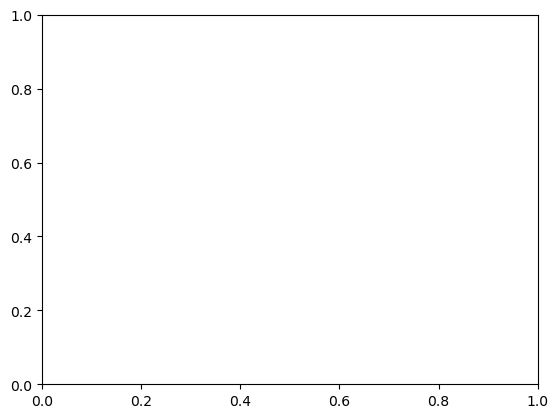

In [28]:
fig, ax = plt.subplots()
top_ten_gross_data[['domestic_gross', 'worldwide_gross']].plot(kind='bar', ax=ax)

ax.set_title('Comparison of Top Ten Domestic Gross and Worldwide Gross')
plt.tight_layout()


In [ ]:
pg_df = top_ten_gross_data[['movie','domestic_gross', 'worldwide_gross']].set_index('movie')

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
pg_df[['domestic_gross', 'worldwide_gross']].plot(kind='bar', ax=ax)

ax.set_title('Comparison of Top Ten Domestic Gross and Worldwide Gross')
plt.tight_layout()

Cleaning the next table 

# TMBD movies

In [ ]:
tmdb_movies.describe()

In [ ]:
tmdb_movies.head()

In [ ]:
null_counts = tmdb_movies.isnull().sum()
null_counts

In [ ]:
pop = tmdb_movies.sort_values(by='popularity', ascending=True)

pop.reset_index(drop=True, inplace=True)
pop.tail()

In [ ]:
vote = tmdb_movies.sort_values(by='vote_count', ascending=True)

vote.reset_index(drop=True, inplace=True)
vote.head(20)

In [ ]:
tmdb_movies.describe()

In [ ]:
tmdb_movies['vote_count'].median()

In [ ]:
filtered_movies = tmdb_movies[(tmdb_movies['vote_count'] > 1000) & (tmdb_movies['original_language'] == 'en')]

# Sort the filtered DataFrame by 'vote_average' in descending order and take the top 10
top_10_movies = filtered_movies.nlargest(10, 'vote_average')

# Create a bar plot for the top 10 movies
plt.figure(figsize=(12, 6))
plt.barh(top_10_movies['original_title'], top_10_movies['vote_average'], color='skyblue')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Vote Average (Vote Count > 1000)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest vote_average at the top
plt.show()

In [ ]:
filtered_movies = tmdb_movies[tmdb_movies['vote_count'] > 1000 & (tmdb_movies['original_language'] == 'en')]
filtered_movies

Cleaning another data set below

# Movie info

In [ ]:
movie_info['currency'].fillna('$', inplace=True)

movie_info.head()

In [ ]:
movie_info_cleaned = movie_info.dropna(subset=['genre', 'rating'])

movie_info_cleaned.reset_index(drop=True, inplace=True)
movie_info_cleaned.head()

In [ ]:
movie_info_cleaned['dvd_date'] = pd.to_datetime(movie_info_cleaned['dvd_date'], format='%b %d, %Y')

In [ ]:
movie_info_cleaned['theater_date'] = pd.to_datetime(movie_info_cleaned['theater_date'], format='%b %d, %Y')

In [ ]:
movie_info_cleaned.isnull().sum()

In [ ]:
movie_info_cleaned.head()

In [ ]:
movie_info_cleaned['dvd_date'].min()

In [ ]:
movie_info_cleaned.loc[10]

In [ ]:
movie_info_cleaned.head(12)

In [ ]:
movie_info_cleaned['dvd_date'].max()

In [ ]:
movie_info_cleaned.loc[10, 'director'] = 'Henry Roosevelt, W.B. Zullo'

In [ ]:
movie_info_cleaned.loc[1125, 'synopsis'] = 'Knock Off'

In [ ]:
movie_info_cleaned['genre'].value_counts().head(20)

In [ ]:
drama_movies = movie_info_cleaned[movie_info_cleaned['genre'].str.contains('drama', case=False)]
drama_movies

In [ ]:
movie_info_cleaned.sort_values(by='synopsis', ascending=True)

In [ ]:
movie_info_cleaned.shape

In [ ]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['runtime'])

In [ ]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['synopsis'])

In [ ]:
movie_info_cleaned = movie_info_cleaned.dropna(subset=['dvd_date'])

In [ ]:
movie_info_cleaned.isnull().sum()

In [ ]:
movie_info_cleaned

In [ ]:
movie_info_cleaned.loc[1123, 'synopsis'] = 'Liliom'

In [ ]:
movie_info_cleaned.loc[1126, 'synopsis'] = 'The Blade'

In [ ]:
movie_info_cleaned.loc[1335, 'synopsis'] = 'In The White City'

Adding the data sets together and limiting the data down to common those who have common values. 

# Combined DF

In [ ]:
tmdb_movies

In [ ]:
movie_info_cleaned.head()

In [ ]:
tmdb_movies.rename(columns={'original_title': 'movie'}, inplace=True)


In [ ]:
movie_info_cleaned.rename(columns={'synopsis': 'movie'}, inplace=True)

In [ ]:
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='inner')
combined_df.to_csv('combined_table.csv', index=False)

In [ ]:
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='inner')

combined_df.to_csv('combined_table.csv', index=False)

In [ ]:
combined_df = pd.merge(movie_info_cleaned, tmdb_movies, on='movie', how='outer')
combined_df['movies'] = combined_df['movie'].fillna(combined_df['movie'])
combined_df = combined_df.drop(['movie', 'movie'], axis=1)
combined_df

In [ ]:
combined_df.shape

In [ ]:
shared_movies = set(movie_info_cleaned['movie']).intersection(set(tmdb_movies['movie']))

# Convert the shared values to a list if needed
shared_movies_list = list(shared_movies)

# Print the shared movie titles
for movie_title in shared_movies_list:
    print(movie_title)

In [ ]:
movie_info_cleaned['theater_date'] = pd.to_datetime(movie_info_cleaned['theater_date'])
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

# Merge the DataFrames based on the converted 'theater_dates' and 'release_date' columns
combo = pd.merge(movie_info_cleaned, tmdb_movies, left_on='theater_date', right_on='release_date', how='inner')

# Drop the duplicate 'release_date' column if needed
combo = combo.drop('release_date', axis=1)

# Print the resulting 'combo' DataFrame
combo.head(9)



In [ ]:
combo = combo.drop_duplicates(subset='id_y', keep='first')

In [ ]:
combo = combo.drop_duplicates(subset='id_x', keep='first')

In [ ]:
combo.shape

In [ ]:
combo.head(239)

In [ ]:
budgets

In [ ]:
combo.rename(columns={'movie_x': 'synopsis'}, inplace=True)

In [ ]:
combo.rename(columns={'movie_y': 'movie'}, inplace=True)

In [ ]:
combo

In [ ]:
zaza = pd.merge(combo, budgets, on='movie', how='inner')
zaza

In [ ]:
zaza.shape

In [ ]:
zaza = pd.merge(combo, budgets, on='movie', how='inner')
zaza_subset = zaza.head(115)
zaza_subset

In [ ]:
zaza.shape

In [ ]:
zaza_subset.shape

In [ ]:
zaza_subset.isnull().sum()

In [ ]:
zaza_subset.loc[1, 'studio'] = 'Entertainment One'
zaza_subset.loc[5, 'studio'] = 'Silver Pictures'
zaza_subset.loc[7, 'studio'] = 'New Line Cinema'
zaza_subset.loc[13, 'studio'] = 'Samuel Goldwyn Productions'
zaza_subset.loc[19, 'studio'] = 'DreamWorks Pictures'
zaza_subset.loc[21, 'studio'] = 'A-Team Productions'
zaza_subset.loc[22, 'studio'] = 'Walt Disney Pictures'
zaza_subset.loc[27, 'studio'] = 'Stanley Kubrick Productions'
zaza_subset.loc[28, 'studio'] = 'Pacific Western Productions'
zaza_subset.loc[33, 'studio'] = 'Laika'
zaza_subset.loc[35, 'studio'] = 'Dimension Films'
zaza_subset.loc[40, 'studio'] = '20th Century Fox'
zaza_subset.loc[42, 'studio'] = 'Walt Disney Pictures|Pixar Animation Studios'
zaza_subset.loc[49, 'studio'] = 'Killer Films'
zaza_subset.loc[53, 'studio'] = 'Anton Capital'
zaza_subset.loc[55, 'studio'] = 'The Ladd Company'
zaza_subset.loc[76, 'studio'] = 'Columbia Pictures'
zaza_subset.loc[77, 'studio'] = 'Relativity Media'
zaza_subset.loc[79, 'studio'] = 'Summit Entertainment'
zaza_subset.loc[80, 'studio'] = 'Sunlight Productions'
zaza_subset.loc[84, 'studio'] = 'Atlas Entertainment'
zaza_subset.loc[93, 'studio'] = 'Bona Film Group'
zaza_subset.loc[102, 'studio'] = 'DreamWorks Pictures'
zaza_subset.loc[106, 'studio'] = 'Columbia Pictures'
zaza_subset.loc[108, 'studio'] = 'EuropaCorp'

In [ ]:
fufu = zaza_subset.sort_values(by='box_office')
fufu.tail(36)

In [ ]:
zaza_subset.loc[97, 'box_office'] = '10484459'

In [ ]:
zaza_subset.loc[101, 'box_office'] = '91970827'

In [ ]:
zaza_subset.loc[103, 'box_office'] = '607274134'

In [ ]:
zaza_subset.loc[106, 'box_office'] = '99630675'

In [ ]:
zaza_subset.loc[107, 'box_office'] = '355237933'

In [ ]:
zaza_subset.loc[109, 'box_office'] = '16706680'

In [ ]:
zaza_subset.loc[60, 'box_office'] = '98159963'

In [ ]:
zaza_subset.loc[66, 'box_office'] = '353659851'

In [ ]:
zaza_subset.loc[76, 'box_office'] = '75837743'

In [ ]:
zaza_subset.loc[70, 'box_office'] = '220021259'

In [ ]:
zaza_subset.loc[77, 'box_office'] = '48190704'

In [ ]:
zaza_subset = zaza_subset.drop(67)

In [ ]:
zaza_subset.loc[82, 'box_office'] = '70181428'

In [ ]:
zaza_subset.loc[95, 'box_office'] = '111928365'

In [ ]:
zaza_subset.loc[4, 'box_office'] = '24337766'

In [ ]:
zaza_subset.loc[5, 'box_office'] = '30303072'

In [ ]:
zaza_subset.loc[7, 'box_office'] = '131211377'

In [ ]:
zaza_subset.loc[13, 'box_office'] = '23661347'

In [ ]:
zaza_subset.loc[14, 'box_office'] = '497375381'

In [ ]:
zaza_subset.loc[21, 'box_office'] = '92455742'

In [ ]:
zaza_subset.loc[22, 'box_office'] = '195243411'

In [ ]:
zaza_subset.loc[25, 'box_office'] = '321669741'

In [ ]:
zaza_subset = zaza_subset.drop(26)

In [ ]:
zaza_subset.loc[27, 'box_office'] = '66441232'

In [ ]:
zaza_subset.loc[28, 'box_office'] = '178127760'

In [ ]:
zaza_subset.loc[29, 'box_office'] = '41142379'

In [ ]:
zaza_subset.loc[35, 'box_office'] = '25837111'

In [ ]:
zaza_subset.loc[36, 'box_office'] = '114178613'

In [ ]:
zaza_subset.loc[40, 'box_office'] = '746045700'

In [ ]:
zaza_subset.loc[42, 'box_office'] = '394436586'

In [ ]:
zaza_subset.loc[43, 'box_office'] = '56032889'

In [ ]:
zaza_subset.loc[49, 'box_office'] = '3862498'

In [ ]:
zaza_subset.loc[52, 'box_office'] = '380080290'

In [ ]:
zaza_subset.loc[55, 'box_office'] = '5474090'

In [ ]:
zaza_subset.loc[58, 'box_office'] = '1946254'

In [ ]:
zaza_subset.loc[53, 'box_office'] = '11122090'

In [ ]:
fufu = zaza_subset.sort_values(by='studio')
fufu.tail(25)

In [ ]:
fufu = zaza_subset.sort_values(by='writer')
fufu.tail(15)

In [ ]:
zaza_subset.loc[6, 'writer'] = 'Yann Martel, David Magee'
zaza_subset.loc[52, 'writer'] = 'George Miller, Brendan McCarthy, Nico Lathouris'
zaza_subset.loc[102, 'writer'] = 'Elizabeth Meriwether'
zaza_subset.loc[59, 'writer'] = 'Justin Theroux'
zaza_subset.loc[104, 'writer'] = 'Michael Markowitz, John Francis Daley, Jonathan Goldstein'
zaza_subset.loc[69, 'writer'] = 'Miles Chapman, Arnell Jesko'
zaza_subset.loc[71, 'writer'] = 'Dean DeBlois'
zaza_subset.loc[81, 'writer'] = 'Eric Heisserer'
zaza_subset.loc[82, 'writer'] = 'David A. Newman, Keith Merryman'
zaza_subset.loc[101, 'writer'] = 'Kurt Sutter'
zaza_subset.loc[8, 'writer'] = 'Pete Jones, Peter Farrelly, Kevin Barnett, Bobby Farrelly'
zaza_subset.loc[32, 'writer'] = 'Ron J. Friedman, Steve Bencich'
zaza_subset.loc[54, 'writer'] = 'Seth Grahame-Smith'
zaza_subset.loc[60, 'writer'] = 'Bob DeRosa, Ted Griffin'

In [ ]:
hehe = zaza_subset.sort_values(by='director')
hehe.tail(11)

In [ ]:
zaza_subset.loc[6, 'director'] = 'Ang Lee'
zaza_subset.loc[52, 'director'] = 'George Miller'
zaza_subset.loc[57, 'director'] = 'Joe Carnahan'
zaza_subset.loc[59, 'director'] = 'Jon Favreau'
zaza_subset.loc[63, 'director'] = 'Luc Besson'
zaza_subset.loc[69, 'director'] = 'Mikael Håfström'
zaza_subset.loc[71, 'director'] = 'Dean DeBlois'
zaza_subset.loc[77, 'director'] = 'Burr Steers'
zaza_subset.loc[81, 'director'] = 'Matthijs van Heijningen Jr.'
zaza_subset.loc[90, 'director'] = 'Brad Silberling'
zaza_subset.loc[109, 'director'] = 'Leigh Whannell'

In [ ]:
fufu = zaza_subset.sort_values(by='box_office')
fufu.tail(36)

In [ ]:
zaza_subset.loc[93, 'title'] = 'Operation Red Sea'
zaza_subset.loc[93, 'movie'] = 'Operation Red Sea'

In [ ]:
zaza_subset['box_office'] = zaza_subset['box_office'].str.replace(',', '')


In [ ]:
zaza_subset['box_office'] = zaza_subset['box_office'].astype(float)


In [ ]:
zaza_subset['total_gross'] = zaza_subset['domestic_gross'] + zaza_subset['worldwide_gross'] + zaza_subset['box_office']
zaza_subset

In [ ]:
zaza_subset.sort_values(by='studio')

In [ ]:
zaza_subset['studio'].value_counts()

In [ ]:
zaza_subset['box_office'].max()

# Combos are done
now that we've combined our data and filterd out rows we can look at the visualisation that are relvent

In [ ]:
studio_box_office = zaza_subset.groupby('title')['box_office'].sum()

top_15_studios = studio_box_office.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_15_studios.plot(kind='bar')
plt.title('Top 15 movies')
plt.xlabel('title')
plt.ylabel('Total Box Office In Millions')
plt.xticks(rotation=90)
plt.show()


In [ ]:
grossing = zaza_subset.groupby('title')['total_gross'].sum()

top_15_gross = studio_box_office.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_15_studios.plot(kind='bar')
plt.title('Top 15 movies')
plt.xlabel('title')
plt.ylabel('Gross In Millions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(zaza_subset.columns)

In [ ]:
zaza_subset['release_date'] = pd.to_datetime(zaza_subset['release_date'])

# Extract month from release_date
zaza_subset['month'] = zaza_subset['release_date'].dt.month

# Calculate the average total_gross for each month
avg_gross_per_month = zaza_subset.groupby('month')['total_gross'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_gross_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Total Gross per Month')
plt.xlabel('Month')
plt.ylabel('Average Total Gross')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average popularity for each director
avg_popularity_per_director = zaza_subset.groupby('director')['popularity'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_popularity_per_director.plot(kind='bar', color='lightgreen')
plt.title('Average Movie Popularity by Director')
plt.xlabel('Director')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average rating for each director and pick top N (e.g., 5)
N = 5
top_directors = zaza_subset.groupby('director')['vote_average'].mean().nlargest(N)

# Plotting
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='lightcoral')
plt.title('Top Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.ylim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()
plt.show()

In [ ]:
quantile_90 = zaza_subset['vote_average'].quantile(0.90)
highest_ratings = zaza_subset[zaza_subset['vote_average'] > quantile_90]['vote_average']

plt.figure(figsize=(12, 6))
plt.hist(highest_ratings, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Top 10% Highest Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xlim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()
plt.show()

In [ ]:
studio_counts = zaza_subset['studio'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
studio_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Movies Produced by Each Studio')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [ ]:

studio_counts = zaza_subset['studio'].value_counts()
studio_box_office = zaza_subset.groupby('studio')['box_office'].sum()
filtered_studios = studio_counts[studio_counts >= 3].index

# Filter the studio_box_office series to include only the filtered studios
filtered_box_office = studio_box_office.loc[filtered_studios]

# Sort the studios by total box office in descending order
filtered_box_office = filtered_box_office.sort_values(ascending=False)

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
filtered_box_office.plot(kind='bar')
plt.title('Top Studios (with 3 or more movies) by Total Box Office')
plt.xlabel('Studio')
plt.ylabel('Total Box Office')

# Customize the y-axis ticks
plt.yticks(range(0, int(filtered_box_office.max()) + 1, 3))

plt.xticks(rotation=90)
plt.show()


In [ ]:
# Calculate the average total_gross for each genre
# If you want total instead of average, replace 'mean' with 'sum'
average_gross_per_genre = zaza_subset.groupby('genre')['total_gross'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_gross_per_genre.sort_values(ascending=True).plot(kind='barh', color='lightseagreen')  # horizontal bar chart for better readability
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Average Gross Earnings')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

The one above has potential but needs to be reorganized.

Let's try to do a visualization that requires some SQL.